In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
sal=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
sal.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [ ]:
sal.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
brand,0
name,0
price,0
spec_rating,0
processor,0
CPU,0
Ram,0
Ram_type,0


In [ ]:
inp=sal[['brand','name','spec_rating','processor','CPU','Ram','Ram_type','ROM_type','GPU','display_size','resolution_height','OS','warranty']]
out=sal[['price']]

In [ ]:
LR = LinearRegression()

In [ ]:
DM=sal[['brand','name','spec_rating','processor','CPU','Ram','Ram_type','ROM_type','GPU','display_size','resolution_height','OS','warranty','price']].dropna()

In [ ]:
DM = DM.copy()

text_cols = ['brand','name','processor','CPU','Ram_type',
             'ROM_type','GPU','OS','warranty']

for col in text_cols:
    DM[col] = DM[col].astype('category').cat.codes


In [ ]:
DM['Ram'] = DM['Ram'].str.replace('GB', '').astype(int)


LR.fit(
    DM[['brand','name','spec_rating','processor','CPU','Ram','Ram_type',
        'ROM_type','GPU','display_size','resolution_height','OS','warranty']],
    DM[['price']]
)


LinearRegression()

In [ ]:
x_test = [[1,4,90,3,2,16,1,0,3,15.6,1080,1,1]]
LR.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[180041.759411]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


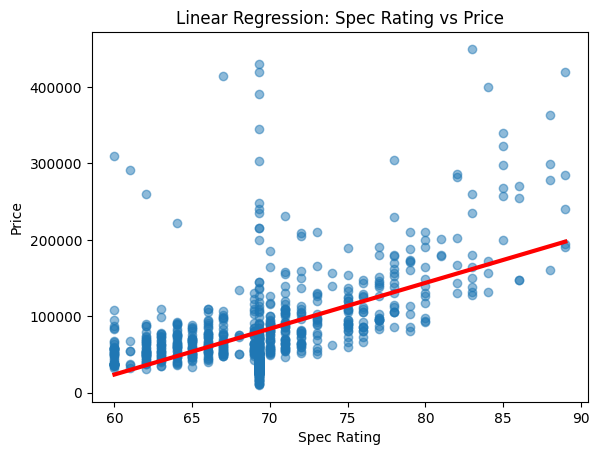

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# select feature and target
X = sal[['spec_rating']]
y = sal[['price']]

# model
LR = LinearRegression()
LR.fit(X, y)

plt.scatter(X, y, alpha=0.5)

# line
x_line = np.linspace(X.min(), X.max(), 100)
y_line = LR.predict(x_line)

plt.plot(x_line, y_line, linewidth=3, color='red')

plt.xlabel("Spec Rating")
plt.ylabel("Price")
plt.title("Linear Regression: Spec Rating vs Price")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


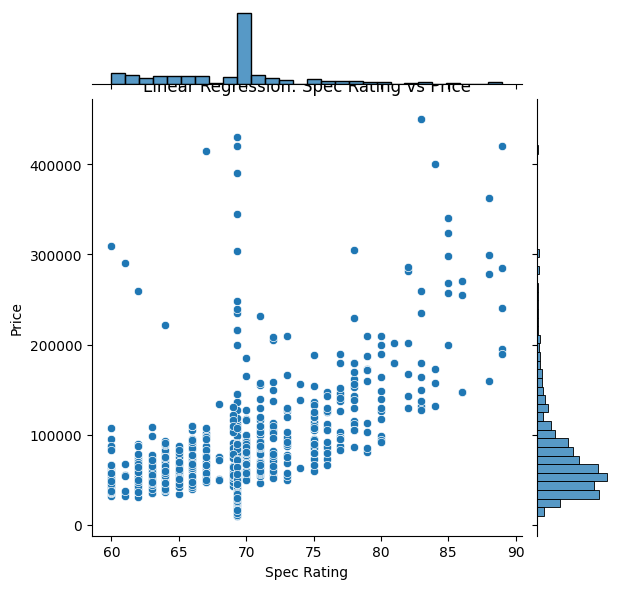

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# select feature and target
X = sal[['spec_rating']]
y = sal[['price']]

# model
LR = LinearRegression()
LR.fit(X, y)

sns.jointplot(x='spec_rating', y='price', data=sal)


# line
x_line = np.linspace(X.min(), X.max(), 100)
y_line = LR.predict(x_line)


plt.xlabel("Spec Rating")
plt.ylabel("Price")
plt.title("Linear Regression: Spec Rating vs Price")
plt.show()

In [ ]:
DM = sal.copy()

# Columns to encode
text_cols = ['brand','name','processor','CPU','Ram_type','ROM_type','GPU','OS']

# Convert text columns to category codes
for col in text_cols:
    DM[col] = DM[col].astype('category').cat.codes

# Convert Ram from "8GB" → 8
DM['Ram'] = DM['Ram'].str.replace('GB', '').astype(int)

# Select final features
X = DM[['brand','name','spec_rating','processor','CPU','Ram','Ram_type',
        'ROM_type','GPU','display_size','resolution_width','resolution_height',
        'OS','warranty']]

y = DM[['price']]


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
x_test = [[1,4,90,3,2,16,1,0,3,15.6,1920,1080,1,1]]
tree.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([254657.])

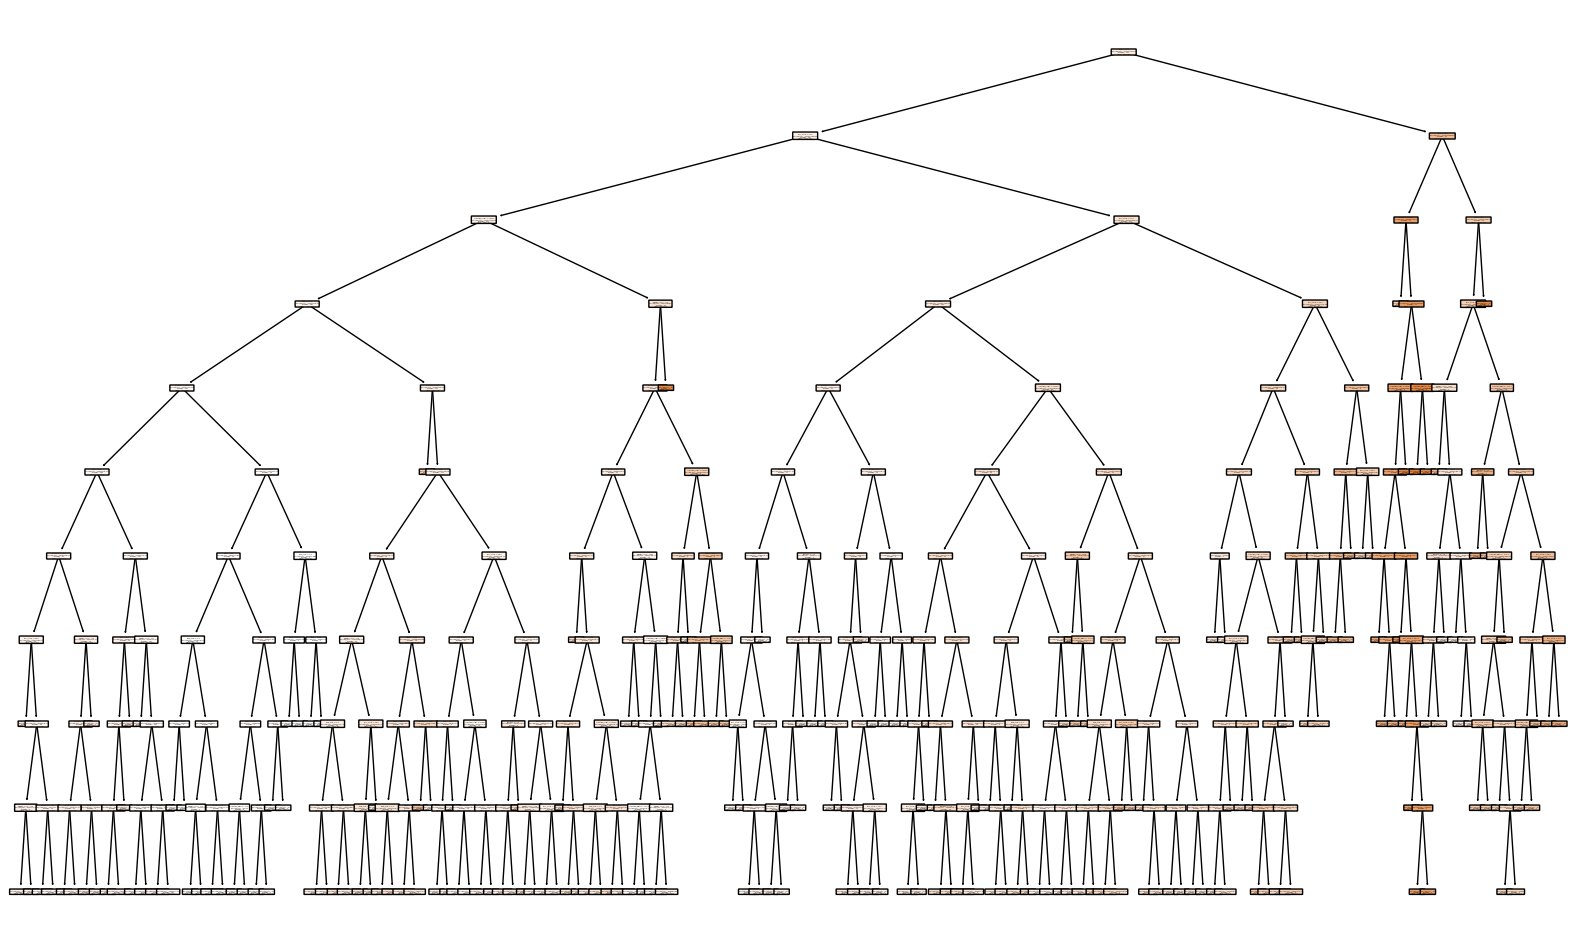

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=0)
plt.show()


In [ ]:
print("")